In [1]:
#pip install numpy pandas matplotlib seaborn geopandas drawarrow highlight_text pypalettes requests 

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from pypalettes import load_cmap
from drawarrow import ax_arrow
import seaborn as sns
import matplotlib.patches as patches


/Users/babaniyiolaniyi/Documents/Documents – Babaniyi’s MacBook Pro/Babaniyi/Git/Data-visualisation/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# GeoJson

In [3]:


url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/world/world.geojson"
response = requests.get(url)

gdf = gpd.read_file(response.content)
gdf.head()

,name,continent,code_sov,code_adm,geometry
0,Costa Rica,North America,CRI,CRI,"POLYGON ((-82.5462 9.56613, -82.93289 9.47681,..."
1,Nicaragua,North America,NIC,NIC,"POLYGON ((-83.65561 10.93876, -83.89505 10.726..."
2,Haiti,North America,HTI,HTI,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."
3,Dominican Rep.,North America,DOM,DOM,"POLYGON ((-71.7083 18.045, -71.68774 18.31666,..."
4,El Salvador,North America,SLV,SLV,"POLYGON ((-89.35333 14.42413, -89.05851 14.340..."


<Axes: >

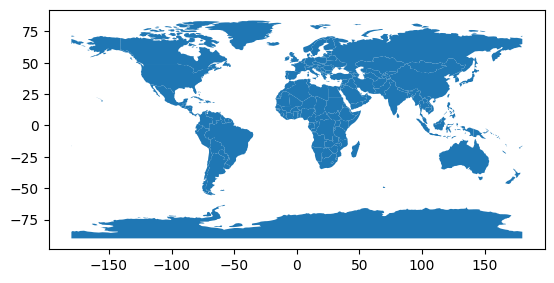

In [4]:
# Use the read_file() function of geopandas
world = gpd.read_file(response.content)
# world is now a geoDataFrame

# Call the plot() method of the geoDataFrame to get a basic map:
world.plot()

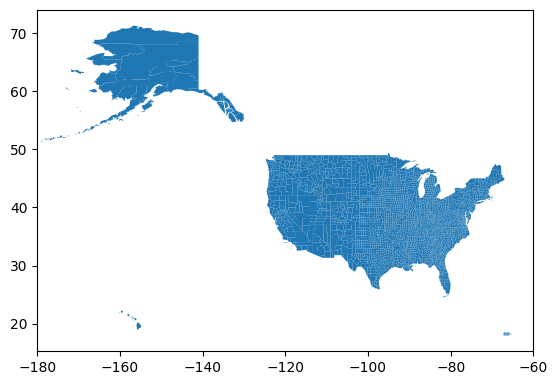

In [5]:
url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/us-counties/us-counties.geojson"
counties = gpd.read_file(requests.get(url).content)

fig, ax = plt.subplots()
ax.set_xlim(-180, -60)

counties.plot(ax=ax)

plt.show()

## Area Selection

longitude ranges from -180 to +180 (west → east), while latitude spans -90 to +90 (south → north).

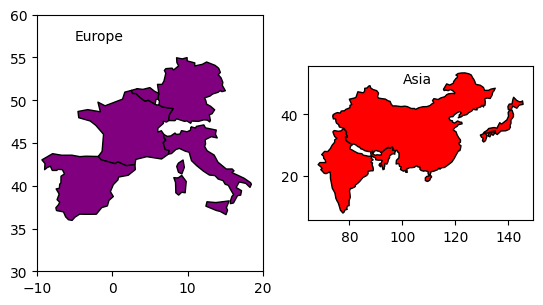

In [6]:
url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/world/world.geojson"
world = gpd.read_file(requests.get(url).content)

europe = world[world["name"].isin(
  ["France", "Italy", "Spain", "Belgium", "Germany"]
)]
asia = world[world["name"].isin(
  ["Japan", "China", "India"]
)]

fig, axs = plt.subplots(ncols=2)

europe.plot(ax=axs[0], color="purple", edgecolor="black")
asia.plot(ax=axs[1], color="red", edgecolor="black")

axs[0].set_xlim(-10, 20)
axs[0].set_ylim(30, 60)
axs[0].text(x=-5, y=57, s="Europe")
axs[1].text(x=100, y=50, s="Asia")

plt.show()

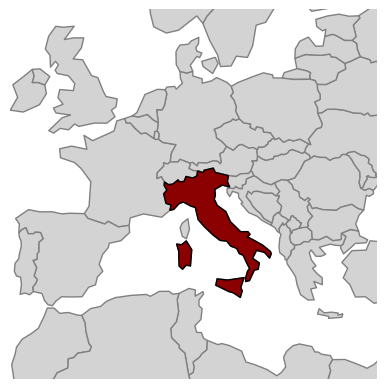

In [7]:
italy = world[world["name"]=="Italy"]

fig, ax = plt.subplots()

# first we draw all countries in grey
world.plot(color="lightgray", edgecolor="grey", ax=ax)

# then we draw Italy with a vibrant color
italy.plot(color="darkred", edgecolor="black", ax=ax)

ax.set_xlim(-10, 30)
ax.set_ylim(30, 60)
ax.axis("off")

plt.show()

# Map Projections

Ever wondered how we turn a spherical Earth into a flat map?

This is done using projections. A projection is basically a mathematical transformations that "flatten" the globe.

No projection is perfect. Some preserve shape, others preserve area, but none can do it all at once.

To change the default projection, use cartopy, a powerful library for map visualization.

Cartopy provides a crs (coordinate reference system) object that lists common projections. You can apply a new projection to a GeoDataFrame using its to_crs() method:

In [8]:
import cartopy.crs as ccrs

/Users/babaniyiolaniyi/Documents/Documents – Babaniyi’s MacBook Pro/Babaniyi/Git/Data-visualisation/.venv/lib/python3.9/site-packages/pyproj/crs/crs.py:1293: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


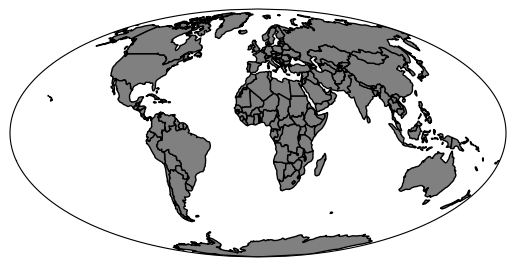

In [9]:
# create the projection variable
#projection = ccrs.ObliqueMercator()
projection = ccrs.Mollweide()

# convert our dataframe to our new projection
world_proj = world.to_crs(projection.to_proj4())

# specify that we want to use a custom projection
fig, ax = plt.subplots(
  subplot_kw={"projection": projection}
)

world_proj.plot(color="gray", edgecolor="black", ax=ax)

plt.show()

# Choropleth Map

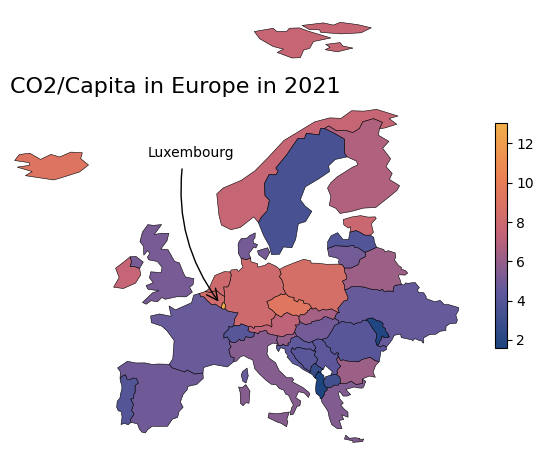

In [10]:
url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/world/world.geojson"
world = gpd.read_file(requests.get(url).content)

url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/CO2/CO2.csv"
df = pd.read_csv(url)

world = world.merge(df, left_on="code_adm", right_on="ISO")
europe = world[world["continent"] == "Europe"]
europe = europe[europe["name"] != "Russia"]

cmap = load_cmap("Sunset2", cmap_type="continuous")

fig, ax = plt.subplots(layout="tight")
europe.plot(
  column="Total",
  cmap=cmap,
  edgecolor="black",
  linewidth=0.4,
  legend=True,
  legend_kwds={"shrink": 0.5},
  ax=ax
)

ax.set_xlim(-25, 41)
ax.set_ylim(33, 82)
ax.axis("off")

ax_arrow(
  [0, 65], [5.5, 50],
  color="black",
  radius=0.2,
  fill_head=False
)
ax.text(x=-5, y=66, s="Luxembourg")

ax.text(
  x=-25, y=73,
  s="CO2/Capita in Europe in 2021",
  size=16
)

plt.show()

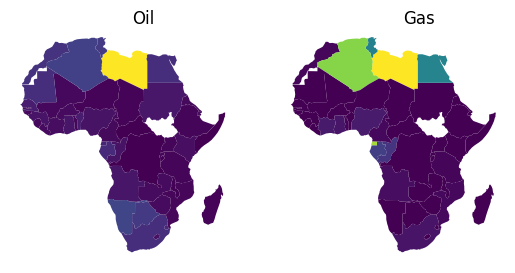

In [11]:
url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/world/world.geojson"
world = gpd.read_file(requests.get(url).content)

url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/CO2/CO2.csv"
df = pd.read_csv(url)

world = world.merge(df, left_on="code_adm", right_on="ISO")
africa = world[world["continent"] == "Africa"]

fig, axs = plt.subplots(ncols=2)

africa.plot(column="Oil", ax=axs[0])
africa.plot(column="Gas", ax=axs[1])

axs[0].text(x=20, y=42, s="Oil", size=12)
axs[1].text(x=20, y=42, s="Gas", size=12)

axs[0].axis("off")
axs[1].axis("off")

plt.show()

In [12]:
africa.head(2)

,name,continent,code_sov,code_adm,geometry,Country,ISO,Total,Coal,Oil,Gas,Cement,Flaring,Other
75,Ethiopia,Africa,ETH,ETH,"POLYGON ((47.78942 8.003, 44.9636 5.00162, 43....",Ethiopia,ETH,0.147922,0.010513,0.104873,0.0,0.032537,0.0,NaN
76,Somalia,Africa,SOM,SOM,"POLYGON ((41.58513 -1.68325, 40.993 -0.85829, ...",Somalia,SOM,0.035766,0.000000,0.035766,0.0,NaN,0.0,NaN


/Users/babaniyiolaniyi/Documents/Documents – Babaniyi’s MacBook Pro/Babaniyi/Git/Data-visualisation/.venv/lib/python3.9/site-packages/pyproj/crs/crs.py:1293: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


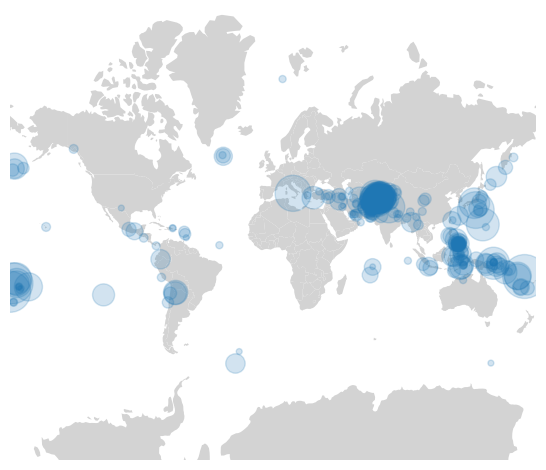

In [13]:
url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/world/world.geojson"
world = gpd.read_file(requests.get(url).content)

url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/earthquakes/earthquakes.csv"
df = pd.read_csv(url)

projection = ccrs.Mercator()
previous_proj = ccrs.PlateCarree() # default projection
world = world.to_crs(projection.to_proj4())

new_coords = projection.transform_points(
    previous_proj,
    df["Longitude"],
    df["Latitude"]
)
x = new_coords[:, 0] # new longitude
y = new_coords[:, 1] # new latitude

min_s = 10
max_s = 1000
s = df["Depth"]
s = min_s + (s - s.min()) * (max_s - min_s) / (s.max() - s.min())

fig, ax = plt.subplots(
  subplot_kw={"projection": projection},
  layout="tight"
)

world.plot(ax=ax, color="lightgrey")
ax.scatter(x, y, s=s, alpha=.2)
ax.axis("off")

plt.show()

/Users/babaniyiolaniyi/Documents/Documents – Babaniyi’s MacBook Pro/Babaniyi/Git/Data-visualisation/.venv/lib/python3.9/site-packages/pyproj/crs/crs.py:1293: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


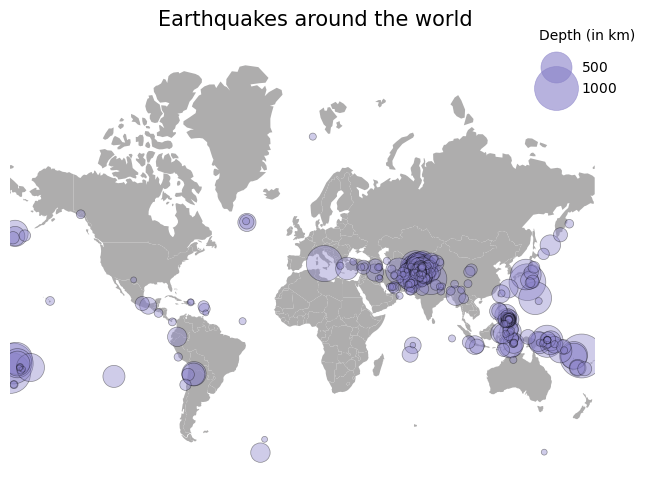

In [14]:
url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/world/world.geojson"
world = gpd.read_file(requests.get(url).content)
world = world[world["name"] != "Antarctica"]

url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/earthquakes/earthquakes.csv"
df = pd.read_csv(url)
df = df.sort_values("Depth", ascending=False)

projection = ccrs.Mercator()
previous_proj = ccrs.PlateCarree()  # default projection
world = world.to_crs(projection.to_proj4())

new_coords = projection.transform_points(
  previous_proj,
  df["Longitude"],
  df["Latitude"]
)
x = new_coords[:, 0]  # new longitude
y = new_coords[:, 1]  # new latitude

min_s = 10
max_s = 1000
s = df["Depth"]
s = min_s + (s - s.min()) * (max_s - min_s) / (s.max() - s.min())

bubble_color = "#8880c8"

fig, ax = plt.subplots(subplot_kw={"projection": projection}, layout="tight")

world.plot(ax=ax, color="#aeadad", linewidth=0)
scatter = ax.scatter(
    x, y, s=s, alpha=0.4, color=bubble_color, edgecolor="black", linewidth=0.5
)
ax.axis("off")

handles, labels = scatter.legend_elements(
    prop="sizes",
    alpha=0.6,
    color=bubble_color,
    num=3,
)
ax.legend(
    handles,
    labels,
    loc=(0.9, 0.9),
    framealpha=0,
)

fig.text(x=1, y=0.97, s="Depth (in km)", ha="right")

fig.text(x=0.5, y=1, s="Earthquakes around the world", ha="center", size=15)

plt.show()

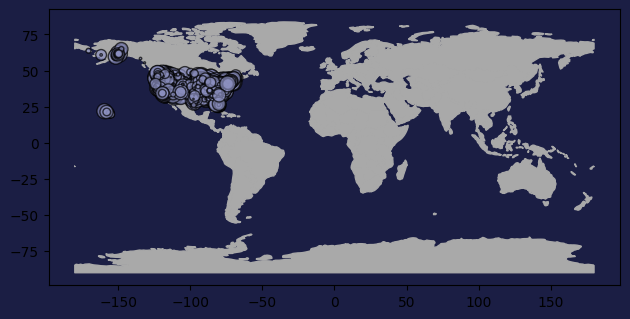

In [15]:
url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/world/world.geojson"
world = gpd.read_file(requests.get(url).content)

url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/ufo/ufo.csv"
ufo = pd.read_csv(url)

fig, ax = plt.subplots(layout="tight")
fig.set_facecolor("#1b1e44")
ax.set_facecolor("#1b1e44")

world.plot(ax=ax, color="darkgrey", edgecolor="darkgrey")
ax.scatter(
  ufo["longitude"],
  ufo["latitude"],
  s=ufo["duration"] * 0.1,
  color="#8c90c0",
  edgecolor="black",
  alpha=0.7,
)


# Projects

/var/folders/f3/w2fmvqr108v8svw61xkgnwcw0000gn/T/ipykernel_95151/1759101243.py:24: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world["centroid"] = world["geometry"].centroid
/var/folders/f3/w2fmvqr108v8svw61xkgnwcw0000gn/T/ipykernel_95151/1759101243.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=world,


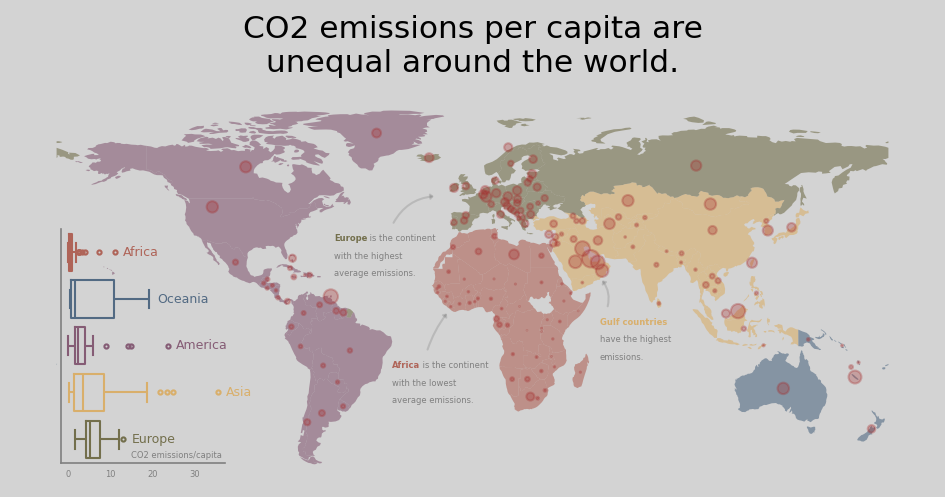

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs
from pypalettes import load_cmap
import seaborn as sns
from drawarrow import ax_arrow
from highlight_text import ax_text

url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/world/world.geojson"
world = gpd.read_file(requests.get(url).content)
world = world[world["name"] != "Antarctica"]
world["continent"] = world["continent"].replace("North America", "America")
world["continent"] = world["continent"].replace("South America", "America")

url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/CO2/CO2.csv"
df = pd.read_csv(url)

world = world.merge(
  df,
  left_on="code_adm",
  right_on="ISO",
)
world["centroid"] = world["geometry"].centroid
x = world["centroid"].x
y = world["centroid"].y
s = world["Total"]

# Define palette:
cmap = load_cmap("Antique", cmap_type="continuous", reverse=False)
colors = {continent: cmap.colors[i] for i, continent in enumerate(world.continent.unique())}
bkg_color = "lightgray"

order_conts = world.groupby("continent")["Total"].median().sort_values(ascending=True).index

fig, ax = plt.subplots(layout="tight", dpi=150)
fig.set_facecolor(bkg_color)
ax.set_facecolor(bkg_color)
axins = ax.inset_axes([0.05, 0.05, 0.18, 0.6])
axins.patch.set_alpha(0)


# Display map:
for i, (g, df_cont) in enumerate(world.groupby("continent")):
  df_cont.plot(ax=ax, color=colors[g], alpha=0.6)

# Bar plot with averages per continent:
sns.boxplot(data=world, 
            y="continent", x="Total",
            ax=axins,
            order=order_conts,
            fill=False,
            fliersize=2,
              # inner="quart",
            linewidth=1,
            palette=colors,
            orient="h")
axins.spines[:].set(color="grey")
axins.spines[["top", "right"]].set_visible(False)
axins.set_yticks([])
axins.set_ylabel("")
axins.set_xlabel("")
axins.tick_params("both", length=0, labelsize=4, labelcolor="grey")
axins.text(0.98, 0.02, s="CO2 emissions/capita",
           color="grey",
           transform=axins.transAxes,
           ha="right", fontsize=4)

# Label boxplot:
for i, cont in enumerate(order_conts):
  max_val = world.loc[world.continent==cont, "Total"].max()
  axins.text(x=max_val+2,
             y=i,
             s=cont,
             color=colors[cont],
             fontsize=6,
             ha="left", va="center")


# Add bubbles:
ax.scatter(x, y, s=s*2, color="brown", alpha=0.3)

# Highlights:
# !. Arabic coutrnies:
ax_text(x=55, y=2,
	    s="<Gulf countries> \nhave the highest\nemissions.",
        ax=ax, size=4, color="grey",
	    highlight_textprops=[
	    {"color": colors["Asia"], "weight": "bold"},
	  ],
)
ax_arrow(
   tail_position=[58, 5],
   head_position=[55, 18],
   head_width=1,
   head_length=1,
   color="grey",alpha=0.3,
   radius=0.3,
   ax=ax,
)


# 2. Africa:
ax_text(x=-35, y=-15,
	    s="<Africa> is the continent\nwith the lowest\naverage emissions.",
        ax=ax, size=4, color="grey",
	    highlight_textprops=[
	    {"color": colors["Africa"], "weight": "bold"},
	  ],
)

ax_arrow(
   tail_position=[-20, -12],
   head_position=[-10, 5],
   head_width=1,
   head_length=1,
   color="grey",alpha=0.3,
   radius=-0.1,
   ax=ax,
)

# 3. Europe
ax_text(x=-60, y=35,
	    s="<Europe> is the continent\nwith the highest\naverage emissions.",
        ax=ax, size=4, color="grey",
	    highlight_textprops=[
	    {"color": colors["Europe"], "weight": "bold"},
	  ],
)

ax_arrow(
   tail_position=[-35, 38],
   head_position=[-15, 50],
   head_width=1,
   head_length=1,
   color="grey",alpha=0.3,
   radius=-0.3,
   ax=ax,
)

# Additional settings:
fig.text(0.5, 0.80,
         "CO2 emissions per capita are\nunequal around the world.",
         fontsize=15,
         ha="center")
ax.axis("off")

plt.show()


## New York

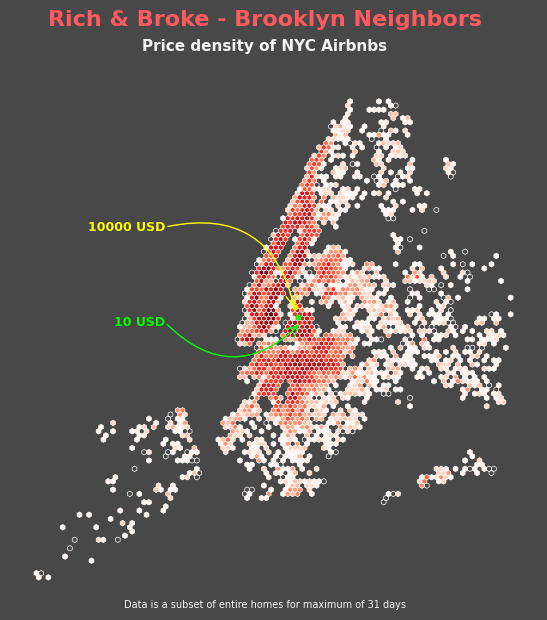

In [17]:
url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/newyork-airbnb/newyork-airbnb.csv"
df = pd.read_csv(url)

entire_home=df[(df["room_type"]=="Entire home/apt") & (df["price"] > 0) & (df["minimum_nights"] <= 31)]
max_price=entire_home[(entire_home["price"]==entire_home["price"].max()) & (entire_home["neighbourhood"].isin(["Greenpoint"]))]
min_price=entire_home[(entire_home["price"]==entire_home["price"].min()) & (entire_home["neighbourhood"].isin(["Greenpoint"]))]

fig, ax = plt.subplots(figsize=(6.8, 6.8))

ax.hexbin(entire_home['longitude'], entire_home['latitude'], C=entire_home["price"]<200, reduce_C_function=np.sum,
             cmap="Reds", bins="log", gridsize=100, mincnt=1, edgecolor="#ffffff", lw=0.5)

ax.scatter(max_price['longitude'], max_price['latitude'], s=10, c="yellow", zorder=10)
ax.scatter(min_price['longitude'], min_price['latitude'], s=10, c="lime", zorder=10)

ax_arrow(
    tail_position=[-74.1, 40.72],
    head_position=[-73.95, 40.72],
    color="lime",
    fill_head=False,
    width=1,
    radius=0.5,
    ax=ax,
)

ax.text(-74.1, 40.72, "10 USD", size=9, weight="bold", color="lime", va="center", ha="right")

ax_arrow(
    tail_position=[-74.1, 40.8],
    head_position=[-73.957, 40.73],
    color="yellow",
    fill_head=False,
    width=1,
    radius=-0.5,
    ax=ax,
)

ax.text(-74.1, 40.8, "10000 USD", size=9, weight="bold", color="yellow", va="center", ha="right")

ax.set_xticks([])
ax.set_yticks([])

ax.spines[["top", "bottom", "left", "right"]].set_visible(False)

fig.suptitle("Rich & Broke - Brooklyn Neighbors", size=16, weight="bold", color="#FF5A5F")
fig.text(0.5, 0.92, "Price density of NYC Airbnbs", size=11, weight="bold", color="#F4F4F4FF", ha="center")
fig.text(0.5, 0.1, "Data is a subset of entire homes for maximum of 31 days", size=7, color="#F4F4F4FF", ha="center")

ax.set_facecolor("#484848")
fig.set_facecolor("#484848")

plt.show()